In [20]:
# %matplotlib widget
import sys, os, importlib
package_path = os.path.abspath('..')    
if package_path not in sys.path:
    sys.path.append(package_path)
from package import functions as fn
from package import model as rm
from package import optimizer as opt
from package import plots
import numpy as np
import matplotlib.pyplot as plt
from obspy.taup import TauPyModel
np.set_printoptions(formatter={'float': lambda x: f"{x:0.3f}"})

In [21]:
def sdr2hidden(sdr, azimuth, in_deg=True):
    if in_deg:
        sdr = np.deg2rad(sdr)
        azimuth = np.deg2rad(azimuth)
    psi, delta, lamb = sdr
    relaz = psi - azimuth
    sR = .5*np.sin(lamb) * np.sin(2*delta)
    qR = np.sin(lamb) * np.cos(2*delta) * np.sin(relaz) + \
        np.cos(lamb) * np.cos(delta) * np.cos(relaz)
    pR = np.cos(lamb) * np.sin(delta) * np.sin(2*(relaz)) - \
        .5*np.sin(lamb) * np.sin(2*delta) * np.cos(2*(relaz))
    qL = -np.cos(lamb) * np.cos(delta) * np.sin(relaz) + \
        np.sin(lamb) * np.cos(2*delta) * np.cos(relaz)
    pL = .5*np.sin(lamb) * np.sin(2*delta) * np.sin(2*(relaz)) + \
        np.cos(lamb) * np.sin(delta) * np.cos(2*(relaz))
    
    return np.array([sR, qR, pR, qL, pL])


Dot product t.p: -0.000


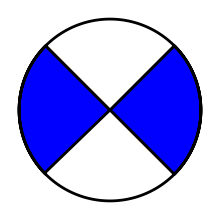

t: [1 0 0], p: [0 1 0]
sdr1: [315.000 90.000 180.000], sdr2: [45.000 90.000 0.000]


In [22]:
seed = np.random.randint(0, 2025)
# seed = 1278
# seed = 2025
np.random.seed(seed)


azimuth = 45  # degrees


# create random array for t, normalised to 1
t = fn.unit_vec(np.random.rand(3))
if t[2] < 0: t = -t

# create random array for p, normalised to 1
direc = fn.unit_vec(np.random.rand(3))
p = fn.starting_direc(t, direc)
if p[2] < 0: p = -p

t = np.array([ 0.11727534, -0.38461938,  0.91559512])
t = fn.unit_vec(t)
p = np.array([-0.31832113,  0.85875371,  0.4015143 ])
p = fn.unit_vec(p)
print(f'Dot product t.p: {np.dot(t,p):0.3f}')

# t, p = fn.i_hat, fn.k_hat
# t, p = fn.unit_vec(fn.i_hat + fn.j_hat), fn.unit_vec(fn.j_hat - fn.i_hat)
t, p = fn.i_hat, fn.j_hat


sdr1, sdr2 = fn.tp2sdr(t, p, deg=True)

beachball = fn.beachball(sdr1)

print(f't: {t}, p: {p}')
print(f'sdr1: {sdr1}, sdr2: {sdr2}')

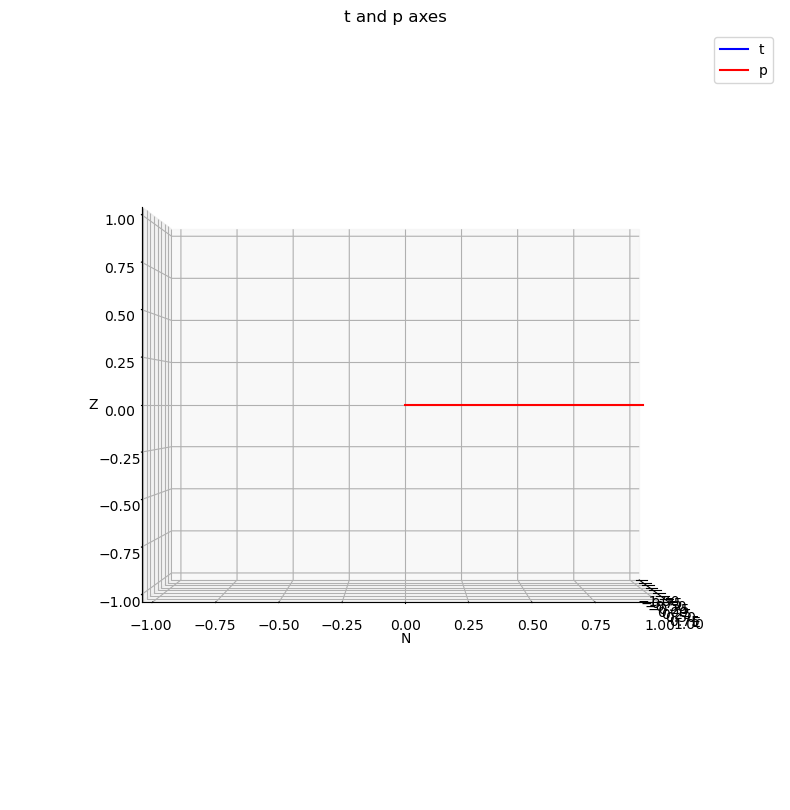

In [23]:
# plot tp axes
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')

start_t = np.zeros(3)
end_t = t
start_p = np.zeros(3)
end_p = p

ax.plot([start_t[0], end_t[0]],
        [start_t[1], end_t[1]],
        [start_t[2], end_t[2]], color='b', label='t')
ax.plot([start_p[0], end_p[0]],
        [start_p[1], end_p[1]],
        [start_p[2], end_p[2]], color='r', label='p')
ax.set_xlim([-1, 1])
ax.set_ylim([-1, 1])
ax.set_zlim([-1, 1])
ax.set_xlabel('E') # = x
ax.set_ylabel('N') # = y
ax.set_zlabel('Z') # = z
ax.legend()
plt.title('t and p axes')

# change view angle
ax.view_init(azim=0, elev=00)


plt.show()

In [24]:
importlib.reload(fn)

mt = fn.tp2mt(t, p)
t_mt, p_mt = fn.mt2tp(mt)

print(f't: {t}, p: {p}')
print(f't_mt: {t_mt}, p_mt: {p_mt}')

t: [1 0 0], p: [0 1 0]
t_mt: [1.000 0.000 0.000], p_mt: [0.000 1.000 0.000]


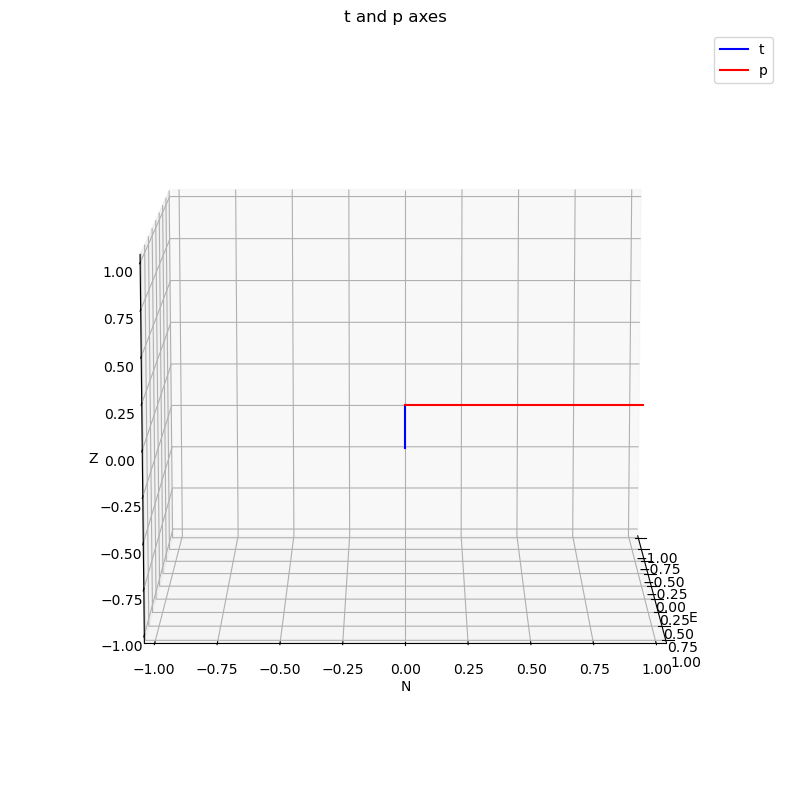

In [25]:
# plot tp axes
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')

start_t = np.zeros(3)
end_t = t_mt
start_p = np.zeros(3)
end_p = p_mt

ax.plot([start_t[0], end_t[0]],
        [start_t[1], end_t[1]],
        [start_t[2], end_t[2]], color='b', label='t')
ax.plot([start_p[0], end_p[0]],
        [start_p[1], end_p[1]],
        [start_p[2], end_p[2]], color='r', label='p')
ax.set_xlim([-1, 1])
ax.set_ylim([-1, 1])
ax.set_zlim([-1, 1])
ax.set_xlabel('E') # = x
ax.set_ylabel('N') # = y
ax.set_zlabel('Z') # = z
ax.legend()
plt.title('t and p axes')

# change view angle
ax.view_init(azim=0, elev=10)


plt.show()

In [26]:
hidden1 = sdr2hidden(sdr1, azimuth, in_deg=True)
hidden2 = sdr2hidden(sdr2, azimuth, in_deg=True)
assert np.allclose(hidden1, hidden2)
print(f'hidden1: {hidden1}\nhidden2: {hidden2}')

hidden1: [0.000 0.000 -0.000 -0.000 1.000]
hidden2: [0.000 0.000 0.000 -0.000 1.000]


In [27]:
importlib.reload(fn)
hidden_mt = fn.hidden2mt(hidden1, azimuth)
print(f'mt:\n{mt}\n\nhidden_mt:\n{hidden_mt}\n')

# # print rank and trace of each matrix
# print(f'rank(mt): {np.linalg.matrix_rank(mt)}, trace(mt): {np.trace(mt)}')
# print(f'rank(hidden_mt): {np.linalg.matrix_rank(hidden_mt)}, trace(hidden_mt): {np.trace(hidden_mt)}')

mt:
[[1.000 0.000 0.000]
 [0.000 -1.000 0.000]
 [0.000 0.000 0.000]]

hidden_mt:
[[1.000 0.000 0.000]
 [0.000 -1.000 0.000]
 [0.000 0.000 0.000]]



In [28]:
importlib.reload(fn)

hidden = fn.mt2hidden(mt, azimuth, in_deg=True)
print(f'hidden: {hidden}')
assert np.allclose(mt, hidden_mt)
assert np.allclose(hidden, hidden1)
assert np.allclose(hidden, hidden2)

hidden: [0.000 -0.000 0.000 0.000 1.000]


### The Lucas Test

In [ ]:
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(15,15))
# ax = plt.axes(projection=ccrs.Mollweide()) $ Mercator, Robinson, Orthographic
ax = plt.axes(projection = ccrs.PlateCarree())
ax.set_global()
ax.coastlines()
# extent
ax.set_extent([-130, -60, 20, 55], crs=ccrs.PlateCarree())
ax.add_feature(cfeature.LAND)
ax.add_feature(cfeature.OCEAN)
ax.add_feature(cfeature.LAKES)
ax.add_feature(cfeature.RIVERS)
ax.add_feature(cfeature.BORDERS, linestyle='-')
ax.add_feature(cfeature.STATES, linestyle=':')
ax.set_title('USA')
ax.plot(-87.6298, 41.8781, marker='*', color='black', markersize=15, transform=ccrs.PlateCarree(), label='Chicago')
ax.plot(-74, 40.7, marker='o', color='blue', markersize=10, transform=ccrs.PlateCarree(), label='New York City')
ax.plot(-95.3698, 29.7604, marker='o', color='red', markersize=10, transform=ccrs.PlateCarree(), label='Houston')
ax.plot(-118.25, 34.05, marker='o', color='green', markersize=10, transform=ccrs.PlateCarree(), label='Los Angeles')

# add text directly to the points
ax.text(-87.6298 + .5, 41.8781 + .5, 'Chicago', transform=ccrs.PlateCarree())
ax.text(-74 + .5, 40.7 + .5, 'New York City', transform=ccrs.PlateCarree())
ax.text(-95.3698 + .5, 29.7604 + .5, 'Houston', transform=ccrs.PlateCarree())
ax.text(-118.25 + .5, 34.05 + .5, 'Los Angeles', transform=ccrs.PlateCarree())


# get current locations of lat/lon labels for chicago
# plot chicago

ax.gridlines(draw_labels=True)
# ax.legend()
plt.show()

In [36]:
# projections = [ccrs.Mercator(), ccrs.Robinson(), ccrs.Orthographic(0, 20), ccrs.PlateCarree()]
# features = [cfeature.LAND, cfeature.OCEAN, cfeature.LAKES, cfeature.RIVERS, cfeature.BORDERS, cfeature.STATES]

# for proj in projections:
#     fig = plt.figure(figsize=(10,10))
#     ax = plt.axes(projection=proj)
#     ax.set_global()
#     ax.coastlines()
#     # extent
#     ax.set_extent([-130, -60, 20, 55], crs=ccrs.PlateCarree())
#     ax.add_feature(cfeature.LAND)
#     ax.add_feature(cfeature.OCEAN)
#     ax.add_feature(cfeature.LAKES)
#     for feature in features:
#         ax.add_feature(feature)
#     ax.set_title(f'USA - {proj.__class__.__name__}')
#     ax.gridlines(draw_labels=True)
#     plt.show()

In [ ]:
import folium

m = folium.Map(location=[42.05, -87.67], zoom_start=4)  # Chicago coordinates
folium.TileLayer('OpenStreetMap').add_to(m)
folium.TileLayer('Stamen Terrain').add_to(m)

cities = {
    ('Chicago', 42.05, -87.67, 'black'),
    ('New York City', 40.7, -74, 'blue'),
    ('Houston', 29.7604, -95.3698, 'red'),
    ('Los Angeles', 34.05, -118.25, 'green'),
}

for city, lat, lon, color in cities:
    folium.Marker(
        location=[lat, lon],
        popup=folium.Popup(city),
        icon=folium.Icon(color=color)
    ).add_to(m)
    
m